# SQL Challenge

## Assumptions for the TA grading my assignment:

### 1. You are using a postgres database
### 2. Your database uses port 5432
### 3. You will need to edit the "databaseconfig.py" file with your connection information


### I know it's a bit early but...


<img src="AprilFools.png" alt="April Fools!" style="border: none;" /><br>


In [1]:
# Dependencies
import psycopg2
import pandas as pd
import databaseconfig as cfg
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt

from pandas import DataFrame
from sqlalchemy import create_engine

In [2]:
# Database connection string
engine = create_engine(f"postgresql://{cfg.mysql['user']}:{cfg.mysql['passwd']}@{cfg.mysql['host']}:5432/{cfg.mysql['db']}")

# Create a database connection
conn = engine.connect()

# Pull salary information from our database
sql = "SELECT * FROM salaries ORDER BY salary ASC;"
df_salary = pd.read_sql(sql, conn)

# Pull average salaries by department
sql = "SELECT d.dept_name AS Dept_Name, AVG(sal.Salary) AS Avg_Salary FROM salaries AS sal "
sql = sql + "INNER JOIN dept_emp AS de ON de.emp_no = sal.emp_no INNER JOIN departments AS d ON d.dept_no = de.dept_no "
sql = sql + "GROUP BY d.dept_name ORDER BY d.dept_name ASC;"
df_avgsalary = pd.read_sql(sql, conn)

# Where's Waldo?
sql = "SELECT emp_no, first_name, last_name FROM employees WHERE emp_no = 499942;"
df_myself = pd.read_sql(sql, conn)

# Make sure we close our connection to the database
conn.close()

df_salary

,id,emp_no,salary,from_date,to_date
0,14024,24024,40000,1993-03-14,1994-03-14
1,40329,50329,40000,1994-12-17,1995-12-17
2,16406,26406,40000,1993-04-12,1994-04-12
3,16397,26397,40000,1995-01-12,1996-01-12
4,12743,22743,40000,1999-10-30,2000-10-29
...,...,...,...,...,...
300019,27558,37558,125469,1989-02-23,1990-02-23
300020,258327,458302,126703,1998-10-05,1999-10-05
300021,244781,444756,127041,1999-06-14,2000-06-13
300022,34188,44188,127238,1991-03-16,1992-03-15


In [3]:
# Min & Max Salaries
min_salary = '${:0,.0f}'.format(df_salary["salary"].min())
max_salary = '${:0,.0f}'.format(df_salary["salary"].max())

# Show our min and max salaries
min_salary, max_salary

('$40,000', '$129,492')

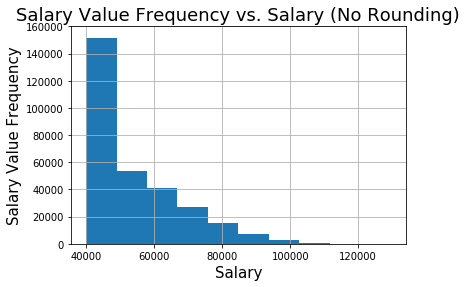

In [4]:
# Histogram
df_salary.hist(column="salary")
plt.xlabel("Salary", fontsize=15)
plt.ylabel("Salary Value Frequency",fontsize=15)
plt.ylim(0, 160000)
plt.title("Salary Value Frequency vs. Salary (No Rounding)", fontsize=18)
plt.show()

In [5]:
# Format average salaries and round to 2 decimal places
df_avgsalary["avg_salary"] = df_avgsalary["avg_salary"].astype(float).map('{:.2f}'.format)

# Show our data
df_avgsalary

,dept_name,avg_salary
0,Customer Service,47998.67
1,Development,48697.33
2,Finance,59533.52
3,Human Resources,44678.65
4,Marketing,61095.90
5,Production,48760.45
6,Quality Management,46456.01
7,Research,48850.19
8,Sales,69832.13


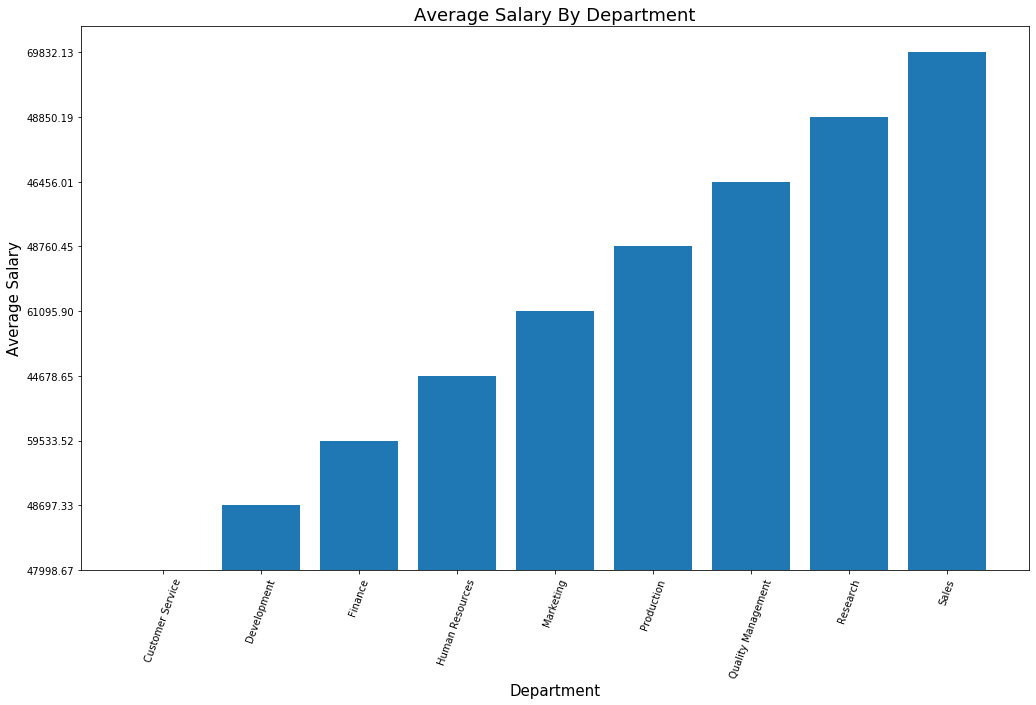

In [6]:
# Generate a bar plot showing the average salary by department
fig=plt.figure(figsize=(17,10))
plt.bar(df_avgsalary["dept_name"], df_avgsalary["avg_salary"])

# Formatting
plt.title("Average Salary By Department", fontsize=18)
plt.xlabel("Department", fontsize=15)
plt.ylabel("Average Salary", fontsize=15)
plt.xticks(rotation=70)

# Show the chart
plt.show()

In [7]:
# Find myself:  Employee_ID = 499942
df_myself

,emp_no,first_name,last_name
0,499942,April,Foolsday
